In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
drugs = ['Amantadine', 'Apomorphine', 
         'APO-go', 'Co-beneldopa', 
         'Madopar', 'Co-careldopa', 
         'Sinemet', 'Entacapone', 
         'Comtess', 'Pergolide', 
         'Rasagiline', 'Azilect', 
         'Selegiline', 'Zelapar', 
         'Tolcapone', 'Tasmar',
         'Levodopa', 'L-DOPA']

In [77]:
def load_data(filename):
    return pd.read_csv(filename,  
                       parse_dates = True)

In [78]:
park = load_data('parkinson_2000tonow.csv')

In [79]:
park.date = pd.to_datetime(park.date)

In [136]:
len(park)

3646

In [7]:
def named_drug(row):
    for d in drugs:
        if d.lower() in row.lower():
            return(d)
        

In [8]:
park['named_drug'] = park.abstract.apply(named_drug)

In [9]:
park.named_drug.notnull().sum()

483

In [10]:
park[park.named_drug.notnull()][:5]

,Unnamed: 0,title,authors,published in,citations,abstract,named_drug
date,,,,,,,
2018-07-11,6,Human tyrosine hydroxylase in Parkinson's dise...,"Toshiharu Nagatsu, Akira Nakashima, Hiroshi Ic...","Journal of neural transmission (Vienna, Austri...",NaN,Parkinson's disease (PD) is an aging-related m...,L-DOPA
2018-07-10,13,MTOR Pathway-Based Discovery of Genetic Suscep...,"Núria Martín-Flores, Rubén Fernández-Santiago,...",Molecular neurobiology,NaN,Dyskinesia induced by L-DOPA administration (L...,L-DOPA
2018-07-10,15,Scaling behavior of drug transport and absorpt...,"William Langhoff, Alexander Riggs, Peter Hinow",PloS one,NaN,Drug delivery to the brain is challenging due ...,L-DOPA
2018-07-10,17,LRRK2 G2019S Parkinson's disease with more ben...,"Sawssan Ben Romdhan, Nouha Farhat, Amina Nasri...",Acta neurologica Scandinavica,NaN,The LRRK2-G2019S mutation is the most common c...,Levodopa
2018-07-06,38,Dysfunctional inhibitory control in Parkinson'...,"Silvia Picazio, Viviana Ponzo, Carlo Caltagiro...",Journal of neurology,NaN,Chronic dopamine replacement therapies in Park...,Levodopa


In [11]:
park.groupby(by = 'named_drug').count().abstract

named_drug
Amantadine       16
Apomorphine      54
Co-beneldopa      1
Entacapone        9
L-DOPA          149
Levodopa        206
Madopar           1
Pergolide        17
Rasagiline       11
Selegiline       16
Sinemet           1
Tolcapone         2
Name: abstract, dtype: int64

In [80]:
fda_drugs = pd.read_table('Products.txt', usecols = ['Form', 'Strength','DrugName', 'ActiveIngredient'])

In [81]:
len(fda_drugs.ActiveIngredient.unique())

2709

In [82]:
fda_drugs.head()

,Form,Strength,DrugName,ActiveIngredient
0,SOLUTION/DROPS;OPHTHALMIC,1%,PAREDRINE,HYDROXYAMPHETAMINE HYDROBROMIDE
1,TABLET;ORAL,500MG,SULFAPYRIDINE,SULFAPYRIDINE
2,INJECTABLE;INJECTION,"20,000 UNITS/ML",LIQUAEMIN SODIUM,HEPARIN SODIUM
3,INJECTABLE;INJECTION,"40,000 UNITS/ML",LIQUAEMIN SODIUM,HEPARIN SODIUM
4,INJECTABLE;INJECTION,"5,000 UNITS/ML",LIQUAEMIN SODIUM,HEPARIN SODIUM


In [83]:
'NORDITROPIN' in fda_drugs.DrugName.values

True

In [84]:
fda_drugs.loc[fda_drugs.DrugName.str.contains('PERGOLIDE')]

,Form,Strength,DrugName,ActiveIngredient
17015,TABLET;ORAL,EQ 0.05MG BASE,PERGOLIDE MESYLATE,PERGOLIDE MESYLATE
17016,TABLET;ORAL,EQ 0.25MG BASE,PERGOLIDE MESYLATE,PERGOLIDE MESYLATE
17017,TABLET;ORAL,EQ 1MG BASE,PERGOLIDE MESYLATE,PERGOLIDE MESYLATE
17074,TABLET;ORAL,EQ 0.05MG BASE,PERGOLIDE MESYLATE,PERGOLIDE MESYLATE
17075,TABLET;ORAL,EQ 0.25MG BASE,PERGOLIDE MESYLATE,PERGOLIDE MESYLATE
17076,TABLET;ORAL,EQ 1MG BASE,PERGOLIDE MESYLATE,PERGOLIDE MESYLATE


In [85]:
fda_drug_names = set(fda_drugs.DrugName.values)

In [86]:
len(fda_drug_names)

7102

In [87]:
fda_act_ingr = set(fda_drugs.ActiveIngredient.values)

In [88]:
def named_fda_drug(row):
    drugs = []
    for d in fda_act_ingr:
        if d in row.upper():
            drugs.append(d)
    if len(drugs) != 0:
        return drugs

In [89]:
park['named_fda_drug'] = park.abstract.apply(named_fda_drug)

In [90]:
park.named_fda_drug.notnull().sum()

786

In [52]:
park.loc[park.named_fda_drug.notnull()][:10]

,Unnamed: 0,title,authors,published in,citations,abstract,named_drug,named_fda_drug
date,,,,,,,,
2018-07-11,5,Drug Delivery and Transport into the Central C...,"Willi Cawello, Marina Braun, Jens-Otto Andreas",European journal of drug metabolism and pharma...,NaN,Pharmacokinetic studies using deconvolution me...,None,[ROTIGOTINE]
2018-07-11,6,Human tyrosine hydroxylase in Parkinson's dise...,"Toshiharu Nagatsu, Akira Nakashima, Hiroshi Ic...","Journal of neural transmission (Vienna, Austri...",NaN,Parkinson's disease (PD) is an aging-related m...,L-DOPA,[OXYGEN]
2018-07-11,9,Anti-neuroinflammatory effects of galangin in ...,"Mi Eun Kim, Pu Reum Park, Ju Yong Na, Inae Jun...",Molecular and cellular biochemistry,NaN,Neuroinflammation resulting from microglial ac...,None,[NITRIC OXIDE]
2018-07-10,17,LRRK2 G2019S Parkinson's disease with more ben...,"Sawssan Ben Romdhan, Nouha Farhat, Amina Nasri...",Acta neurologica Scandinavica,NaN,The LRRK2-G2019S mutation is the most common c...,Levodopa,[LEVODOPA]
2018-07-10,20,7 receptors in the regulation of anxiety-like ...,"Cheng Xue Du, Yuan Guo, Qiao Jun Zhang, Jin Zh...",Neurological research,NaN,7 receptors in the prelimbic (PrL) cortex are ...,None,[DIMETHYL SULFOXIDE]
2018-07-09,24,Noradrenergic receptor modulation influences t...,"Laura M Grant, Kelsey J Barth, Cagla Muslu, Cy...",Behavioral neuroscience,NaN,Rats produce high rates of ultrasonic vocaliza...,None,"[EPINEPHRINE, CLONIDINE]"
2018-07-07,33,Cyclosomatostatin- and haloperidol-induced cat...,"Ilya D Ionov, Irina I Pushinskaya, Nicholas P ...",Neuroscience letters,NaN,Total sleep deprivation (SD) has been found to...,None,[HALOPERIDOL]
2018-07-06,38,Dysfunctional inhibitory control in Parkinson'...,"Silvia Picazio, Viviana Ponzo, Carlo Caltagiro...",Journal of neurology,NaN,Chronic dopamine replacement therapies in Park...,Levodopa,[LEVODOPA]
2018-07-05,43,Structure and dynamics of the extended-helix s...,"Yoon-Hui Sung, David Eliezer",Protein science : a publication of the Protein...,NaN,The Parkinson's protein alpha-synuclein binds ...,None,[ALCOHOL]


In [53]:
len(park)

3646

In [57]:
drug_counts = park.named_fda_drug.apply(lambda x: pd.Series(x).value_counts()).sum()

In [72]:
drug_counts.sort_values(ascending = False)

LEVODOPA                   235.0
OXYGEN                     135.0
NITRIC OXIDE                61.0
ADENOSINE                   50.0
AMPHETAMINE                 39.0
HYDROGEN PEROXIDE           30.0
CARBIDOPA                   29.0
HALOPERIDOL                 24.0
ALCOHOL                     20.0
COPPER                      20.0
SELEGILINE                  19.0
EPINEPHRINE                 17.0
AMINO ACIDS                 17.0
ROTIGOTINE                  11.0
ASCORBIC ACID               11.0
NICOTINE                    11.0
NITROGEN                    11.0
ENTACAPONE                  10.0
CABERGOLINE                  9.0
SECRETIN                     8.0
CLOZAPINE                    8.0
RIVASTIGMINE                 8.0
ACETYLCYSTEINE               8.0
ESTRADIOL                    7.0
RESERPINE                    6.0
METHYLPHENIDATE              6.0
OLANZAPINE                   6.0
HELIUM                       6.0
TESTOSTERONE                 6.0
GLYCINE                      6.0
          

In [113]:
drug_counts_dict = defaultdict(dict)
for year in range(2000, 2018, 1):
    mask = (park.date > str(year))&(park.date < str(year+1))
    drug_counts = park.loc[mask]\
        .named_fda_drug.apply(lambda x: pd.Series(x).value_counts()).sum()
    drug_counts_dict[year] = drug_counts.sort_values(ascending = False)[:20]\
        .to_dict()

In [114]:
df_drug_counts = pd.DataFrame(drug_counts_dict).transpose()

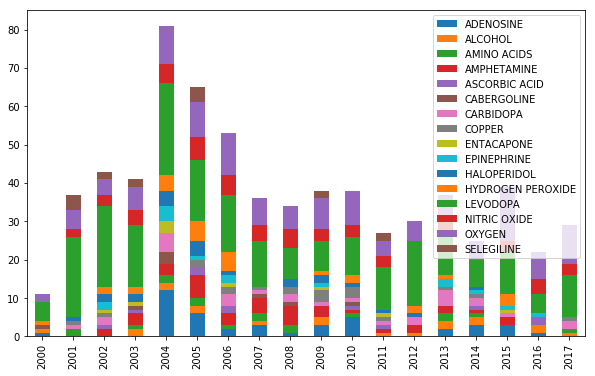

In [139]:
# keep only columns with more than 9 non-null rows
df_drug_counts.dropna(axis = 1, thresh = 6).plot(kind = 'bar',
                                                 figsize = (10,6),
                                                 stacked = True)
